In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import backtrader as bt
from datetime import datetime
from rl_trading.strategy.strategy import MovingAverageCrossoverStrategy, RandomStrategy

class AllInSizer(bt.Sizer):
    def _getsizing(self, comminfo, cash, data, isbuy):
        if isbuy:
            # Get commission and slippage info
            commission_info = self.broker.getcommissioninfo(data)
            commission_rate = commission_info.p.commission
            slippage_perc = self.broker.p.slip_perc

            # Estimate transaction cost and slippage
            price = data.close[0]
            gross_cost = cash / price
            commission = commission_rate * gross_cost
            slippage = slippage_perc * price

            # Adjust size to account for estimated commission and slippage
            net_cash = cash - (commission + slippage * gross_cost)
            size = net_cash / price
            return size
        else:
            # For selling, return the size of the current position
            return self.broker.getposition(data).size

# Instantiate Cerebro engine
cerebro = bt.Cerebro()

# Add data feed
df = pd.read_hdf('../data/binance_ohlcv.h5').iloc[-10000:]

data = bt.feeds.PandasData(dataname=df)

cerebro.adddata(data)

# Add strategy
cerebro.addstrategy(MovingAverageCrossoverStrategy)
cerebro.addstrategy(RandomStrategy)

# Add sizer
cerebro.addsizer(AllInSizer)

# Set broker parameters
cerebro.broker.set_cash(10000)
cerebro.broker.setcommission(commission=0.001)  # 0.1% of the operation value
cerebro.broker.set_slippage_perc(0.005)  # 0.5% slippage

# Run the backtest
results = cerebro.run()

# Plot the results
cerebro.plot(width=20, height=12, tight=True, iplot=False)
plt.tight_layout()

In [ ]:
results[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Evaluating strategy: BuyAndHoldStrategy:   0%|          | 0/5 [00:13<?, ?it/s]

Final RQ: 2802.624288480364


Evaluating strategy: MeanReversionStrategy:   0%|          | 0/5 [00:23<?, ?it/s]

Final RQ: 11076.736355873865


Evaluating strategy: MovingAverageCrossoverStrategy:   0%|          | 0/5 [00:34<?, ?it/s]

Final RQ: 8273.534180079183


Evaluating strategy: VolatilityAdjustedDMAC:   0%|          | 0/5 [00:45<?, ?it/s]        

Final RQ: 9773.500739609393


Evaluating strategy: BollingerBandsStrategy:   0%|          | 0/5 [00:56<?, ?it/s]

Final RQ: 9300.596083023722


Evaluating strategy: ARIMAStrategy:   0%|          | 0/5 [01:07<?, ?it/s]         

Final RQ: 8728.317664977367


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
Evaluating strategy: RLStrategy:   0%|          | 0/5 [12:44<?, ?it/s]   

Final RQ: 10412.070159250688
Final RQ: 12386.867737140577
Final RQ: 12842.409741143367
Final RQ: 11789.846878118202
Final RQ: 14604.16403122732


Evaluating strategy: BuyAndHoldStrategy:  20%|██        | 1/5 [20:02<1:19:14, 1188.64s/it]

Final RQ: 2729.15004072636


Evaluating strategy: MeanReversionStrategy:  20%|██        | 1/5 [20:12<1:19:14, 1188.64s/it]

Final RQ: 9600.054682069976


Evaluating strategy: MovingAverageCrossoverStrategy:  20%|██        | 1/5 [20:22<1:19:14, 1188.64s/it]

Final RQ: 8373.121594925926


Evaluating strategy: VolatilityAdjustedDMAC:  20%|██        | 1/5 [20:33<1:19:14, 1188.64s/it]        

Final RQ: 8237.039578153828


Evaluating strategy: BollingerBandsStrategy:  20%|██        | 1/5 [20:45<1:19:14, 1188.64s/it]

Final RQ: 10070.174103213121


Evaluating strategy: ARIMAStrategy:  20%|██        | 1/5 [20:56<1:19:14, 1188.64s/it]         

Final RQ: 9041.047385112079


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
Evaluating strategy: RLStrategy:  20%|██        | 1/5 [32:42<1:19:14, 1188.64s/it]   

Final RQ: 9217.48520634405
Final RQ: 10165.852402804636
Final RQ: 11122.601241399436
Final RQ: 9952.21813740737
Final RQ: 13144.088878628423


Evaluating strategy: BuyAndHoldStrategy:  40%|████      | 2/5 [39:40<59:07, 1182.42s/it]

Final RQ: 2648.8011157716605


Evaluating strategy: MeanReversionStrategy:  40%|████      | 2/5 [39:49<59:07, 1182.42s/it]

Final RQ: 8852.304499432505


Evaluating strategy: MovingAverageCrossoverStrategy:  40%|████      | 2/5 [39:59<59:07, 1182.42s/it]

Final RQ: 7483.649080750079


Evaluating strategy: VolatilityAdjustedDMAC:  40%|████      | 2/5 [40:10<59:07, 1182.42s/it]        

Final RQ: 8058.284404902631


Evaluating strategy: BollingerBandsStrategy:  40%|████      | 2/5 [40:21<59:07, 1182.42s/it]

Final RQ: 9777.027509828871


Evaluating strategy: ARIMAStrategy:  40%|████      | 2/5 [40:31<59:07, 1182.42s/it]         

Final RQ: 8197.266669467444


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood 

Final RQ: 9693.124568881381
Final RQ: 10334.162419881797
Final RQ: 11119.977410384223
Final RQ: 10568.239645558899
Final RQ: 13013.125929577176


Evaluating strategy: BuyAndHoldStrategy:  60%|██████    | 3/5 [57:48<37:59, 1139.51s/it]

Final RQ: 2755.891028775674


Evaluating strategy: MeanReversionStrategy:  60%|██████    | 3/5 [57:57<37:59, 1139.51s/it]

Final RQ: 10354.113411894992


Evaluating strategy: MovingAverageCrossoverStrategy:  60%|██████    | 3/5 [58:07<37:59, 1139.51s/it]

Final RQ: 8726.048447712428


Evaluating strategy: VolatilityAdjustedDMAC:  60%|██████    | 3/5 [58:17<37:59, 1139.51s/it]        

Final RQ: 7987.104991242785


Evaluating strategy: BollingerBandsStrategy:  60%|██████    | 3/5 [58:27<37:59, 1139.51s/it]

Final RQ: 9693.786403357122


Evaluating strategy: ARIMAStrategy:  60%|██████    | 3/5 [58:37<37:59, 1139.51s/it]         

Final RQ: 10015.082278685602


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
Evaluating strategy: RLStrategy:  60%|██████    | 3/5 [1:08:53<37:59, 1139.51s/it] 

Final RQ: 10118.764542594929
Final RQ: 10834.129119982168
Final RQ: 11376.97794601833
Final RQ: 10534.02174481767
Final RQ: 13592.448454609212


Evaluating strategy: BuyAndHoldStrategy:  80%|████████  | 4/5 [1:15:35<18:31, 1111.21s/it]

Final RQ: 2844.102177360617


Evaluating strategy: MeanReversionStrategy:  80%|████████  | 4/5 [1:15:44<18:31, 1111.21s/it]

Final RQ: 12132.76866559515


Evaluating strategy: MovingAverageCrossoverStrategy:  80%|████████  | 4/5 [1:15:54<18:31, 1111.21s/it]

Final RQ: 9295.108279495886


Evaluating strategy: VolatilityAdjustedDMAC:  80%|████████  | 4/5 [1:16:04<18:31, 1111.21s/it]        

Final RQ: 9309.650472572128


Evaluating strategy: BollingerBandsStrategy:  80%|████████  | 4/5 [1:16:14<18:31, 1111.21s/it]

Final RQ: 10852.96208796785


Evaluating strategy: ARIMAStrategy:  80%|████████  | 4/5 [1:16:24<18:31, 1111.21s/it]         

Final RQ: 10289.603497926846


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
Evaluating strategy: RLStrategy:  80%|████████  | 4/5 [1:27:30<18:31, 1111.21s/it]   

Final RQ: 10790.430900212588
Final RQ: 12760.424306195448
Final RQ: 13553.675484957885
Final RQ: 11111.182376650599
Final RQ: 13904.19519565223


Evaluating strategy: RLStrategy: 100%|██████████| 5/5 [1:34:00<00:00, 1128.07s/it]


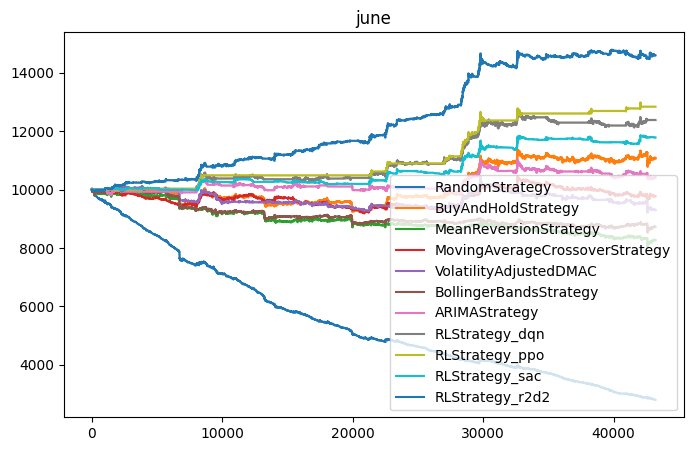

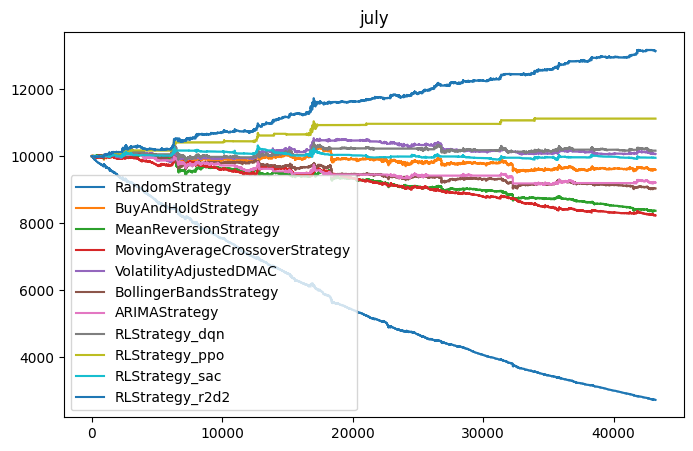

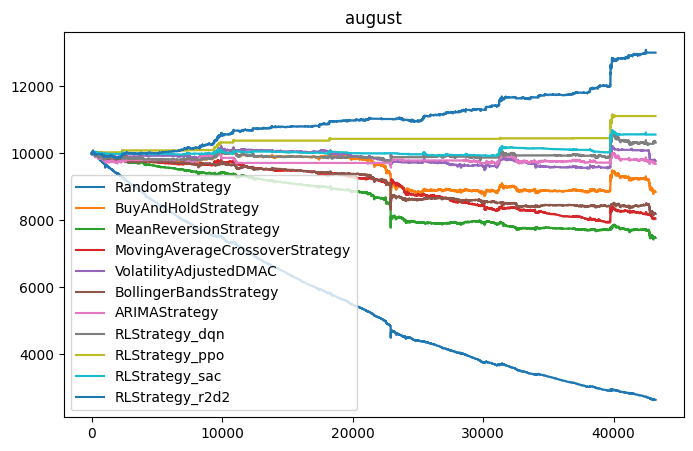

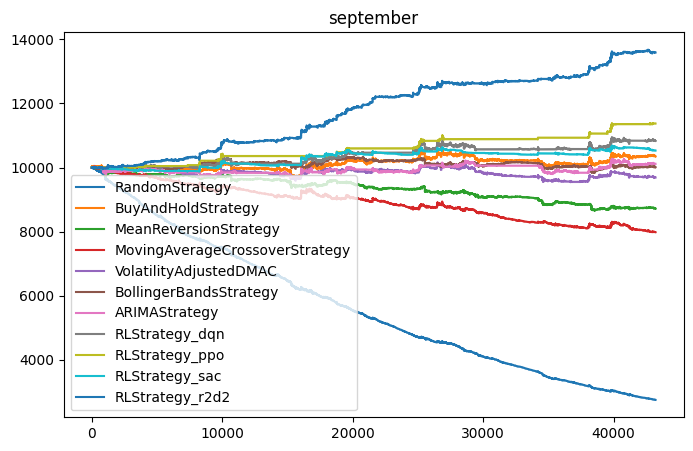

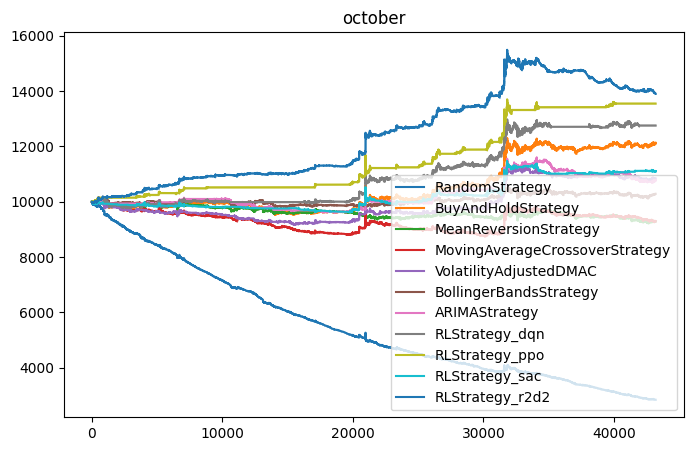

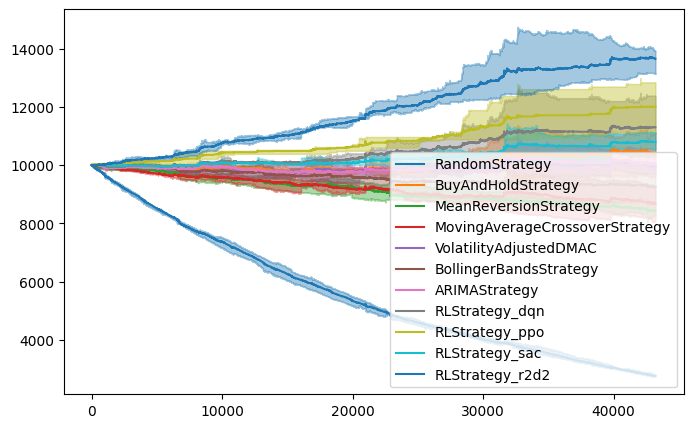

In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import ray
import warnings
import os
import logging

import matplotlib.pyplot as plt
import pandas as pd
import backtrader as bt
from datetime import datetime
from rl_trading.strategy.strategy import *
from rl_trading.strategy.sizer import AllInSizer
from rl_trading.strategy.analyzers import RelativeQuoteAnalyzer
from tqdm import tqdm

def q25(x):
    return x.quantile(0.25)

def q75(x):
    return x.quantile(0.75)

def run_and_plot_strategy(strategy, data, pred_path):
    cerebro = bt.Cerebro()
    if issubclass(strategy, RLStrategy):
        cerebro.addstrategy(strategy, pred_path=pred_path)
    else:
        cerebro.addstrategy(strategy)
    cerebro.adddata(data)
    cerebro.broker.set_cash(10000)
    cerebro.broker.setcommission(commission=0.0001)
    cerebro.broker.set_slippage_perc(0.0)
    cerebro.addsizer(AllInSizer)
    cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio', riskfreerate=0.0, timeframe=bt.TimeFrame.Minutes)
    cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
    cerebro.addanalyzer(RelativeQuoteAnalyzer, _name='relative_quote')
    
    results = cerebro.run()
    # fig = cerebro.plot(width=20, height=12, tight=True, iplot=True)[0][0]
    # fig.savefig(f'strategy_plots/{strategy.__name__}.png')
    # plt.close()
    return results[0]
    
# Assuming df is your DataFrame with data
df = pd.read_hdf('../data/binance_ohlcv.h5').loc[pd.to_datetime('2023-06-01'):pd.to_datetime('2023-11-01')]

results = {}
metrics = {}

eval_months = ['june', 'july', 'august', 'september', 'october']

pbar = tqdm(eval_months, desc='Generating predictions', position=0)
for month in pbar:
    rl_preds = pd.read_csv(f'../data/dqn_preds/rl_preds_{month}.csv', index_col=0)
    rl_preds.index = pd.to_datetime(rl_preds.index)
    last_timestamp = rl_preds.index[-1]
    data = bt.feeds.PandasData(dataname=df.loc[last_timestamp - pd.Timedelta(days=30) + pd.Timedelta(minutes=1): last_timestamp])
    for strategy in [RandomStrategy, BuyAndHoldStrategy, MeanReversionStrategy, MovingAverageCrossoverStrategy, VolatilityAdjustedDMAC, BollingerBandsStrategy, ARIMAStrategy, RLStrategy]:    
        pbar.set_description(f'Evaluating strategy: {strategy.__name__}')
        if issubclass(strategy, RLStrategy): 
            for model in ['dqn', 'ppo', 'sac', 'r2d2']:
                if f'{strategy.__name__}_{model}' not in results:
                    results[f'{strategy.__name__}_{model}'] = []
                    metrics[f'{strategy.__name__}_{model}'] = {}
                result = run_and_plot_strategy(strategy, data, f'../data/{model}_preds/rl_preds_{month}.csv')
                metrics[f'{strategy.__name__}_{model}']['relative_quote'] = result.analyzers.relative_quote.get_analysis()['relative_quote']
                metrics[f'{strategy.__name__}_{model}']['drawdown'] = result.analyzers.drawdown.get_analysis()['drawdown']
                metrics[f'{strategy.__name__}_{model}']['sharpe_ratio'] = result.analyzers.sharpe_ratio.get_analysis()['sharperatio']
                result_df = pd.DataFrame(result.data_log)
                results[f'{strategy.__name__}_{model}'].append(result_df)
        else:
            if strategy.__name__ not in results:
                results[strategy.__name__] = []
                metrics[strategy] = {}
            result = run_and_plot_strategy(strategy, data, '')
            metrics[strategy]['relative_quote'] = result.analyzers.relative_quote.get_analysis()['relative_quote']
            metrics[strategy]['drawdown'] = result.analyzers.drawdown.get_analysis()['drawdown']
            metrics[strategy]['sharpe_ratio'] = result.analyzers.sharpe_ratio.get_analysis()['sharperatio']
            result_df = pd.DataFrame(result.data_log)
            results[strategy.__name__].append(result_df)
        # plt.plot(result_df['datetime'], result_df['value'], label=f'{strategy.__name__}')
    plt.figure(figsize=(8, 5))
    for i, (strategy, result_dfs) in enumerate(results.items()):
        concat_df = result_dfs[-1]
        concat_df = concat_df.groupby(concat_df.index)['value'].agg(['mean', 'min', 'max', q25, q75])
        
        # plt.fill_between(concat_df.index, concat_df['min'], concat_df['max'], alpha=0.2, color=f'C{i}')
        plt.fill_between(concat_df.index, concat_df['q25'], concat_df['q75'], alpha=0.4, color=f'C{i}')
        plt.plot(concat_df['mean'], color=f'C{i}', label=f'{strategy}')
    plt.title(f'{month}')
    plt.legend()
    plt.savefig(f'strategy_plots/strategy_comparison_{month}.png')

plt.figure(figsize=(8, 5))
for i, (strategy, result_dfs) in enumerate(results.items()):
    concat_df = pd.concat(result_dfs)
    concat_df = concat_df.groupby(concat_df.index)['value'].agg(['mean', 'min', 'max', q25, q75])
    
    # plt.fill_between(concat_df.index, concat_df['min'], concat_df['max'], alpha=0.2, color=f'C{i}')
    plt.fill_between(concat_df.index, concat_df['q25'], concat_df['q75'], alpha=0.4, color=f'C{i}')
    plt.plot(concat_df['mean'], color=f'C{i}', label=f'{strategy}')
plt.legend()

# plt.xlabel('Date')
# plt.xticks(rotation=45)
# plt.ylabel('Portfolio Value')
# plt.title('Strategy Performance Comparison')
# plt.legend()
# plt.tight_layout()
# plt.savefig('strategy_plots/strategy_performance_comparison.png')

In [8]:
import pickle
with open('results.pkl', 'wb') as file:
    pickle.dump(results, file)

In [10]:
with open('metrics.pkl', 'wb') as file:
    pickle.dump(metrics, file)

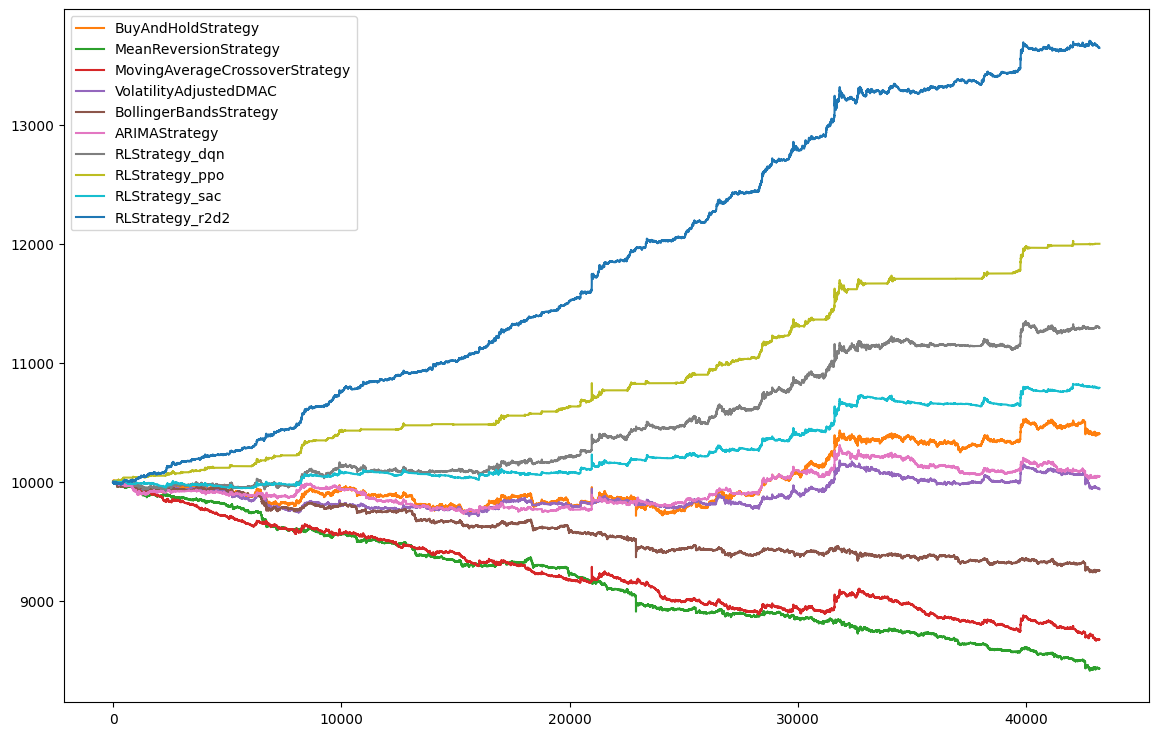

In [7]:
plt.figure(figsize=(14, 9))
for i, (strategy, result_dfs) in enumerate(results.items()):
    if strategy == 'RandomStrategy':
        continue
    concat_df = pd.concat(result_dfs)
    concat_df = concat_df.groupby(concat_df.index)['value'].agg(['mean', 'min', 'max', q25, q75])
    
    # plt.fill_between(concat_df.index, concat_df['min'], concat_df['max'], alpha=0.2, color=f'C{i}')
    # plt.fill_between(concat_df.index, concat_df['q25'], concat_df['q75'], alpha=0.4, color=f'C{i}')
    plt.plot(concat_df['mean'], color=f'C{i}', label=f'{strategy}')
plt.legend()

In [8]:
plt.savefig('eval.png')

<Figure size 640x480 with 0 Axes>

In [10]:
results['RandomStrategy']

[                 datetime       balance  position         value
 0     2023-06-01 00:01:00  10000.000000  0.000000  10000.000000
 1     2023-06-01 00:02:00    999.100033  0.330616  10000.124910
 2     2023-06-01 00:03:00   9999.224807  0.000000   9999.224807
 3     2023-06-01 00:04:00    999.025889  0.330531  10000.800551
 4     2023-06-01 00:05:00    999.025889  0.330531   9999.666831
 ...                   ...           ...       ...           ...
 43195 2023-06-30 23:56:00   2891.701603  0.000000   2891.701603
 43196 2023-06-30 23:57:00    288.909916  0.085409   2891.842774
 43197 2023-06-30 23:58:00    288.909916  0.085409   2891.287613
 43198 2023-06-30 23:59:00    288.909916  0.085409   2891.501137
 43199 2023-07-01 00:00:00    288.909916  0.085409   2892.303130
 
 [43200 rows x 4 columns],
                  datetime       balance  position         value
 0     2023-07-02 00:01:00  10000.000000  0.000000  10000.000000
 1     2023-07-02 00:02:00    999.102972  0.294251   9999.100

In [5]:
import pickle
with open('eval_results.pkl', 'wb') as file:
    pickle.dump(results, file)

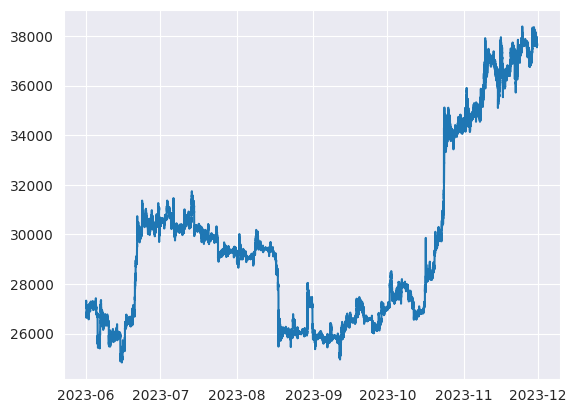

In [6]:
plt.plot(df1.loc[pd.to_datetime('2023-06-01'):]['price'])

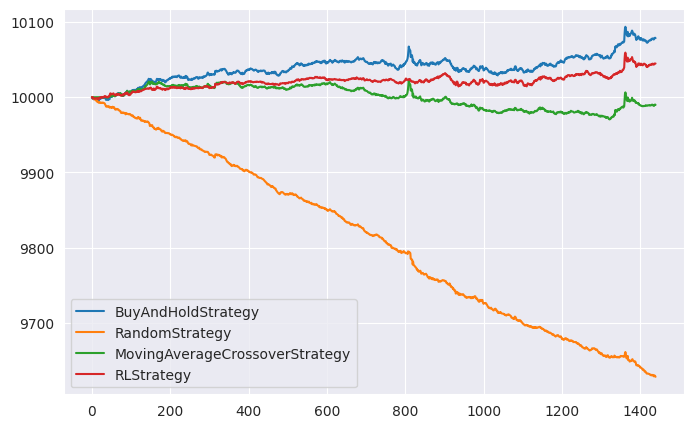

In [3]:
plt.figure(figsize=(8, 5))
for i, (strategy, result_dfs) in enumerate(results.items()):
    concat_df = pd.concat(result_dfs)
    concat_df = concat_df.groupby(concat_df.index)['value'].agg(['mean', 'min', 'max', q25, q75])
    
    # plt.fill_between(concat_df.index, concat_df['min'], concat_df['max'], alpha=0.2, color=f'C{i}')
    # plt.fill_between(concat_df.index, concat_df['q25'], concat_df['q75'], alpha=0.4, color=f'C{i}')
    plt.plot(concat_df['mean'], color=f'C{i}', label=f'{strategy}')
    
plt.legend()

In [5]:
results['RLStrategy']

[Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Ind

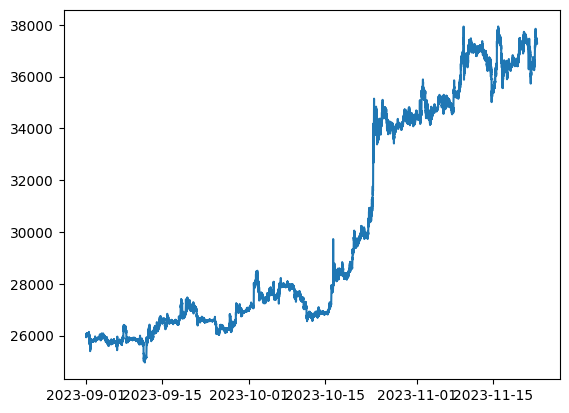

In [55]:
df = pd.read_hdf('../data/binance_ohlcv.h5').loc[pd.to_datetime('2023-09-01'):]
plt.plot((df['open'] + df['close']) / 2)

In [35]:
def agg_trajectory(df):
    df['value_mean'] = df['value'].mean()
    df['value_p25'] = df['value'].quantile(0.25)
    df['value_p75'] = df['value'].quantile(0.75)
    df['value_min'] = 

,datetime,balance,position,value
0,2023-10-01 00:00:00,10000.000000,0.000000,10000.000000
1,2023-10-01 00:01:00,10000.000000,0.000000,10000.000000
2,2023-10-01 00:02:00,990.996992,0.333858,9990.252154
3,2023-10-01 00:03:00,9981.252899,0.000000,9981.252899
4,2023-10-01 00:04:00,9981.252899,0.000000,9981.252899
...,...,...,...,...
1435,2023-10-30 23:55:00,6432.244751,0.000000,6432.244751
1436,2023-10-30 23:56:00,6432.244751,0.000000,6432.244751
1437,2023-10-30 23:57:00,6432.244751,0.000000,6432.244751
1438,2023-10-30 23:58:00,6432.244751,0.000000,6432.244751


In [3]:
import pandas as pd

df = pd.read_hdf('../data/binance_ohlcv.h5').loc[pd.to_datetime('2023-10-01') + pd.Timedelta(minutes=1):pd.to_datetime('2023-10-31')]

In [6]:
df.index[-1].timestamp()

1698710400.0

In [8]:
df2.loc[:1698710400].to_hdf('../data/eval_data.h5', key='data', format='table')

In [7]:
df2 = pd.read_hdf('/home/fassty/Devel/school/diploma_thesis/code/data/binance_BTC_USDT_new.h5')
df2

,amount,price
timestamp,,
1502942460,1.775183,4261.480000
1502942580,0.261074,4280.560000
1502942640,0.012008,4261.480000
1502942700,0.140796,4261.480000
1502943480,0.075455,4262.187216
...,...,...
1700406000,33.372000,36441.188104
1700406060,21.839630,36455.101213
1700406120,4.700650,36444.464377


## Strategy optimization

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import backtrader as bt
from itertools import product
from rl_trading.strategy.strategy import ARIMAStrategy
from rl_trading.strategy.sizer import AllInSizer
from rl_trading.strategy.analyzers import RelativeQuoteAnalyzer

cerebro = bt.Cerebro()

param_ranges = dict(
    lookback=[30],
    order=list(product(range(0, 6, 1), range(0, 2, 1), range(0, 2, 1))),
)
total_runs = len(list(product(*param_ranges.values())))
print(f'Optimization will run for {total_runs} runs')

df = pd.read_hdf('../data/binance_ohlcv.h5').loc[pd.to_datetime('2023-05-14'):pd.to_datetime('2023-05-18')]
data = bt.feeds.PandasData(dataname=df)

cerebro.adddata(data)

cerebro.optstrategy(
    ARIMAStrategy,
    **param_ranges
)
cerebro.addsizer(AllInSizer)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, _name='sharpe_ratio', riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(RelativeQuoteAnalyzer, _name='relative_quote')

cerebro.broker.set_cash(10000)
cerebro.broker.setcommission(commission=0.0001)
cerebro.broker.set_slippage_perc(0.0)

opt_runs = cerebro.run(maxcpus=4)

max_value = 0
best_params = None
for run in opt_runs:
    for strategy in run:
        relative_quote = strategy.analyzers.relative_quote.get_analysis()['relative_quote']
        if relative_quote > max_value:
            max_value = relative_quote
            best_params = strategy.params  # Access the strategy parameters

print(f"Best Parameters: {best_params}, Final Value: {max_value}")

2023-12-17 12:56:42,725	WARNING __init__.py:10 -- PG has/have been moved to `rllib_contrib` and will no longer be maintained by the RLlib team. You can still use it/them normally inside RLlib util Ray 2.8, but from Ray 2.9 on, all `rllib_contrib` algorithms will no longer be part of the core repo, and will therefore have to be installed separately with pinned dependencies for e.g. ray[rllib] and other packages! See https://github.com/ray-project/ray/tree/master/rllib_contrib#rllib-contrib for more information on the RLlib contrib effort.
2023-12-17 12:56:42,737	WARNING __init__.py:10 -- ApexDQN has/have been moved to `rllib_contrib` and will no longer be maintained by the RLlib team. You can still use it/them normally inside RLlib util Ray 2.8, but from Ray 2.9 on, all `rllib_contrib` algorithms will no longer be part of the core repo, and will therefore have to be installed separately with pinned dependencies for e.g. ray[rllib] and other packages! See https://github.com/ray-project/r

Optimization will run for 24 runs
Final RQ: 9814.033343704004
Final RQ: 10000.0


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10379.370396210645


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Final RQ: 10331.00839474654
Final RQ: 9744.018761850724


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 9964.634958825705


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10180.945240681282


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10061.065028563833


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10147.812769693268


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10087.042253632282


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10148.466872871266


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10052.960483640103


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10095.591723849482


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Error fitting ARIMA model: LU decomposition error.


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10142.994515733188


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10068.506854899295


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10302.621425374266


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10022.336866114727


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10022.143106268179


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Error fitting ARIMA model: LU decomposition error.


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10245.711615714257


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10089.648248299538


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10030.360877364117


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Error fitting ARIMA model: LU decomposition error.


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10066.515908575484


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 10036.871399712449


/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/fassty/anaconda3/envs/diploma_thesis/lib/python3.10/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

Final RQ: 9904.13960939704
Best Parameters: <backtrader.metabase.AutoInfoClass_LineRoot_LineMultiple_LineSeries_LineIterator_DataAccessor_StrategyBase_Strategy_BaseStrategy_ARIMAStrategy object at 0x7f93b8f9fca0>, Final Value: 10379.370396210645


In [3]:
best_params
opt_runs

KeyboardInterrupt: 

In [26]:
best_params.__dict__

{'fast1': 7,
 'slow1': 30,
 'fast2': 18,
 'slow2': 49,
 'volatility_period': 14,
 'volatility_threshold': 0.0005}